In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('transaction items.csv')

In [3]:
df.head()

,Time,Register Name/Number,Cashier Name,Operation Type,Store Code,UPC,Line Item,Department,Category,Supplier,...,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Transaction ID,Customer ID
0,03/13/2023 04:42 PM,Register 2,Dominic A,SALE,*400000009773,*074265013280,ZIYAD HALVA /VANILLA,general,general,not tracked,...,4.99,1.0,0.0,4.99,0.0,4.99,0.0,4.99,6B3FCFA1-DAE7-4FE3-8764-9C6141D53256,54861335
1,03/13/2023 04:42 PM,Register 2,Dominic A,SALE,*400000000428,*,Aladdin Bowl,Cafe,Aladdins Bowls,not tracked,...,12.99,1.0,0.0,12.99,0.0,12.99,0.0,12.99,33EEC9A4-0917-4DF9-B870-E46B39E58ED9,54861335
2,03/13/2023 04:42 PM,Register 2,Dominic A,SALE,*400000000084,*,Baklava Square,Cafe,Desserts,not tracked,...,2.25,1.0,0.0,2.25,0.0,2.25,0.0,2.25,33EEC9A4-0917-4DF9-B870-E46B39E58ED9,54861335
3,03/13/2023 04:42 PM,Register 2,Dominic A,SALE,*400000008936,*,Lunch box special,general,general,not tracked,...,10.99,1.0,0.0,10.99,0.0,10.99,0.0,10.99,33EEC9A4-0917-4DF9-B870-E46B39E58ED9,54861335
4,03/13/2023 04:26 PM,Register 2,Dominic A,SALE,*400000007496,*,Specialty Retail Store,Retail Store,general,not tracked,...,2.50,4.0,0.0,10.00,0.0,10.00,0.0,10.00,11046549-D002-411D-B9FC-994902E8DC16,54861335


In [4]:
df_ws = df.loc[df['Line Item'] == 'Alad. Large Plain WS']

In [5]:
df = df.loc[(df["Line Item"] == 'Alad. Large Plain') | (df['Line Item'] == 'Lunch box special') | (df['Category'] == 'Stuffed Pita Sandwiches')]

In [6]:
def pita_package_count(row):
    if row['Category'] == 'Stuffed Pita Sandwiches' or row['Line Item'] == 'Lunch box special':
        return row['Quantity']/5
    else:
        return row['Quantity']

In [7]:
df['pita count'] = df.apply(pita_package_count,axis=1)

df_ws['pita count'] = df_ws.apply(pita_package_count,axis=1)

In [8]:
df.head(20)

,Time,Register Name/Number,Cashier Name,Operation Type,Store Code,UPC,Line Item,Department,Category,Supplier,...,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Transaction ID,Customer ID,pita count
3,03/13/2023 04:42 PM,Register 2,Dominic A,SALE,*400000008936,*,Lunch box special,general,general,not tracked,...,1.0,0.0,10.99,0.0,10.99,0.0,10.99,33EEC9A4-0917-4DF9-B870-E46B39E58ED9,54861335,0.2
12,03/13/2023 04:24 PM,Register 2,Dominic A,SALE,*400000000343,*,Falafel Sandwich (Vegetarian),Cafe,Stuffed Pita Sandwiches,not tracked,...,1.0,0.0,7.99,0.0,7.99,0.0,7.99,57B1276C-0C1B-4DD8-A2AC-63053635D3B8,54861335,0.2
16,03/13/2023 04:20 PM,Register 2,Dominic A,SALE,*400000000305,*,Chicken Shawarma,Cafe,Stuffed Pita Sandwiches,not tracked,...,1.0,0.0,8.99,0.0,8.99,0.0,8.99,43D79AC2-5BD8-45AD-83F4-204B95851517,54861335,0.2
28,03/13/2023 04:09 PM,Register 2,Dominic A,SALE,*400000000305,*,Chicken Shawarma,Cafe,Stuffed Pita Sandwiches,not tracked,...,2.0,0.0,17.98,0.0,17.98,0.0,17.98,FFEDA654-27DA-4EE3-AE9E-04DC9E4C248F,54861335,0.4
31,03/13/2023 04:03 PM,Register 2,Dominic A,SALE,*400000000336,*,Gyro Sandwich,Cafe,Stuffed Pita Sandwiches,not tracked,...,1.0,0.0,8.99,0.0,8.99,0.0,8.99,6F9B2F9B-3D76-45A4-8087-A17F58C428A4,54861335,0.2
35,03/13/2023 03:57 PM,Register 2,Dominic A,SALE,*400000000305,*,Chicken Shawarma,Cafe,Stuffed Pita Sandwiches,not tracked,...,2.0,0.0,17.98,0.0,17.98,0.0,17.98,CF7CC33B-5A05-4DBD-B9CC-5293678C15A4,54861335,0.4
36,03/13/2023 03:49 PM,Register 2,Dominic A,SALE,*400000001012,*073998126700,Alad. Large Plain,Retail Store,Bread,not tracked,...,4.0,0.0,7.20,0.0,7.20,0.0,7.20,26FBC13B-6AAC-41B1-8450-6AABC3DC93C7,54861335,4.0
67,03/13/2023 03:14 PM,Register 2,Dominic A,SALE,*400000000305,*,Chicken Shawarma,Cafe,Stuffed Pita Sandwiches,not tracked,...,2.0,0.0,17.98,0.0,17.98,0.0,17.98,E51500F6-E167-4886-837F-B01BFA3160D8,54861335,0.4
84,03/13/2023 02:53 PM,Register 2,Dominic A,SALE,*400000001012,*073998126700,Alad. Large Plain,Retail Store,Bread,not tracked,...,2.0,0.0,3.60,0.0,3.60,0.0,3.60,F9A681E6-3F3A-4217-96BB-AEEB6B7906C8,54861335,2.0
87,03/13/2023 02:53 PM,Register 2,Dominic A,SALE,*400000000336,*,Gyro Sandwich,Cafe,Stuffed Pita Sandwiches,not tracked,...,1.0,0.0,8.99,0.0,8.99,0.0,8.99,F9A681E6-3F3A-4217-96BB-AEEB6B7906C8,54861335,0.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42945 entries, 3 to 429939
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  42945 non-null  object 
 1   Register Name/Number  42945 non-null  object 
 2   Cashier Name          42945 non-null  object 
 3   Operation Type        42945 non-null  object 
 4   Store Code            42945 non-null  object 
 5   UPC                   42945 non-null  object 
 6   Line Item             42945 non-null  object 
 7   Department            42945 non-null  object 
 8   Category              42945 non-null  object 
 9   Supplier              42945 non-null  object 
 10  Supplier Code         0 non-null      float64
 11  Cost                  42945 non-null  float64
 12  Price                 42945 non-null  float64
 13  Quantity              42945 non-null  float64
 14  Modifiers             42945 non-null  float64
 15  Subtotal          

In [10]:
df['date'] = pd.to_datetime(df['Time'])

df_ws['date'] = pd.to_datetime(df_ws['Time'])

In [11]:
df.set_index('date',inplace=True)

df_ws.set_index('date',inplace=True)

In [12]:
df_daily = df['Quantity'].resample('D').sum()

df_ws_daily = df_ws['Quantity'].resample('D').sum()

In [13]:
df_daily.to_csv('large_white_plain_sales.csv')

In [13]:
df_daily.head()

date
2021-01-12      1.0
2021-01-13      3.0
2021-01-14     99.0
2021-01-15     94.0
2021-01-16    202.0
Freq: D, Name: Quantity, dtype: float64

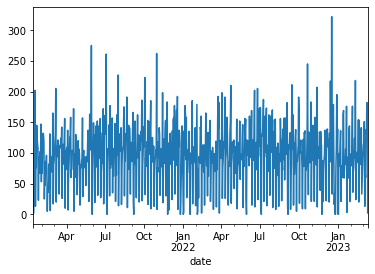

In [14]:
df_daily.plot();

In [15]:
index = pd.date_range(start='1/1/2021',end='12/31/2023')

In [16]:
index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=1095, freq='D')

In [17]:
df_daily = df_daily.reindex(index)

df_ws_daily = df_ws_daily.reindex(index)

In [18]:
df_daily.head()

2021-01-01   NaN
2021-01-02   NaN
2021-01-03   NaN
2021-01-04   NaN
2021-01-05   NaN
Freq: D, Name: Quantity, dtype: float64

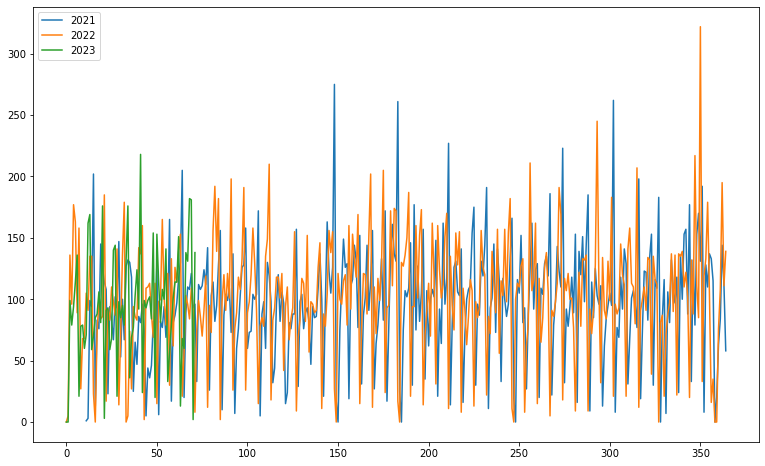

In [19]:
year_groups = df_daily.groupby(pd.Grouper(freq='A'))
pita_annual = pd.DataFrame()
for yr,group in year_groups:
    pita_annual[yr.year] = group.values.ravel()
pita_annual.plot(figsize=(13,8),subplots=False,legend=True);

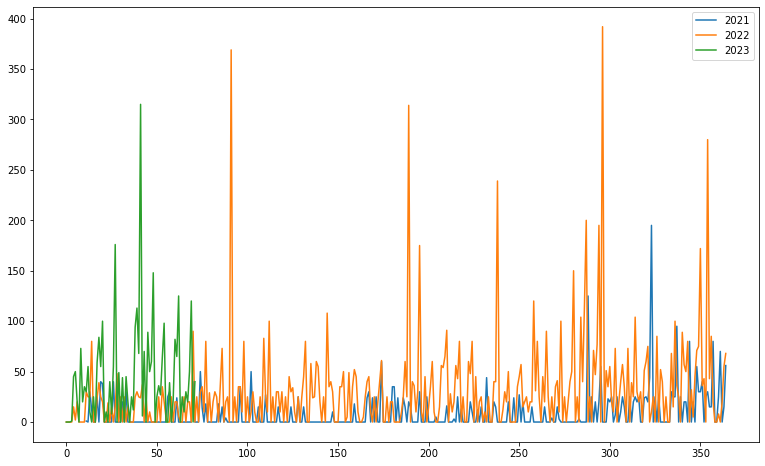

In [20]:
year_groups = df_ws_daily.groupby(pd.Grouper(freq='A'))
pita_annual = pd.DataFrame()
for yr,group in year_groups:
    pita_annual[yr.year] = group.values.ravel()
pita_annual.plot(figsize=(13,8),subplots=False,legend=True);

In [21]:
df_daily.head(20)

2021-01-01      NaN
2021-01-02      NaN
2021-01-03      NaN
2021-01-04      NaN
2021-01-05      NaN
2021-01-06      NaN
2021-01-07      NaN
2021-01-08      NaN
2021-01-09      NaN
2021-01-10      NaN
2021-01-11      NaN
2021-01-12      1.0
2021-01-13      3.0
2021-01-14     99.0
2021-01-15     94.0
2021-01-16    202.0
2021-01-17     13.0
2021-01-18     83.0
2021-01-19     76.0
2021-01-20    145.0
Freq: D, Name: Quantity, dtype: float64

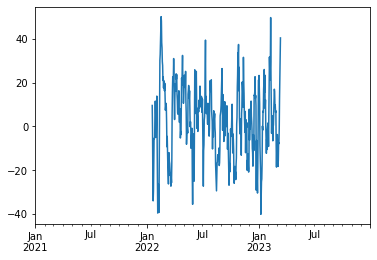

In [22]:
df_daily.rolling(7).mean().diff(365).plot();

In [23]:
df_daily_na = df_daily.dropna()

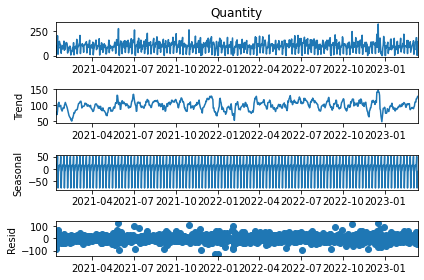

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_daily_na, model='additive',extrapolate_trend='freq')
result.plot()
plt.show()

# Prophet

In [39]:
df_daily_prophet = df_daily_na.reset_index()

In [40]:
df_daily_prophet.head()

,index,Quantity
0,2021-01-12,1.0
1,2021-01-13,3.0
2,2021-01-14,99.0
3,2021-01-15,94.0
4,2021-01-16,202.0


In [43]:
df_daily_prophet.rename(columns={'index':'ds','Quantity':'y'},inplace=True)

In [44]:
df_daily_prophet.head()

,ds,y
0,2021-01-12,1.0
1,2021-01-13,3.0
2,2021-01-14,99.0
3,2021-01-15,94.0
4,2021-01-16,202.0


In [100]:
from datetime import datetime
df_daily_prophet['ds'].astype(strftime('%y-%m-%d')

AttributeError: 'Series' object has no attribute 'strftime'

In [62]:
df_daily_prophet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791 entries, 0 to 790
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      791 non-null    datetime64[ns]
 1   y       791 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.5 KB


In [57]:
df_daily_prophet.loc[df_daily_prophet['ds'] == df_daily_prophet['ds'].max()].index[0]*0.8

632.0

In [65]:
df_daily_prophet['ds'].iloc[632]

Timestamp('2022-10-06 00:00:00')

In [81]:
train = df_daily_prophet.iloc[:633]
test = df_daily_prophet[633:]

In [89]:
df_daily_prophet.loc[df_daily_prophet['ds'] == '2023-01-12']

,ds,y
730,2023-01-12,71.0


In [90]:
train_full = df_daily_prophet[:731]
test_full = df_daily_prophet[731:]

In [91]:
train_full.tail()

,ds,y
726,2023-01-08,21.0
727,2023-01-09,78.0
728,2023-01-10,79.0
729,2023-01-11,60.0
730,2023-01-12,71.0


In [27]:
!pip install fbprophet

In [28]:
import fbprophet

In [29]:
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [30]:
from fbprophet import Prophet

In [186]:
ramadan = pd.DataFrame({
  'holiday': 'ramadan',
  'ds': pd.to_datetime(['2021-04-12','2022-04-01','2023-03-22']),
  'lower_window': 0,
  'upper_window': 29,
})

In [187]:
model = Prophet(holidays=ramadan)
model.add_country_holidays(country_name = 'US')

In [205]:
model.train_holiday_names

0                         ramadan
1                  New Year's Day
2       New Year's Day (Observed)
3      Martin Luther King Jr. Day
4           Washington's Birthday
5                    Memorial Day
6                Independence Day
7     Independence Day (Observed)
8                       Labor Day
9                    Columbus Day
10                   Veterans Day
11                   Thanksgiving
12                  Christmas Day
13       Christmas Day (Observed)
14        Veterans Day (Observed)
dtype: object

In [188]:
model.fit(train_full)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [189]:
train_dates = pd.DataFrame(train_full['ds'])
train_dates

,ds
0,2021-01-12
1,2021-01-13
2,2021-01-14
3,2021-01-15
4,2021-01-16
...,...
726,2023-01-08
727,2023-01-09
728,2023-01-10
729,2023-01-11


In [190]:
train_forecast = model.predict(train_dates)

In [191]:
print(train_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 2021-01-12   75.396817   37.774671  113.357409
1 2021-01-13   98.122895   63.492382  135.554335
2 2021-01-14   94.121199   55.595124  131.819625
3 2021-01-15   98.163891   60.328166  135.027706
4 2021-01-16  132.783348   94.808760  170.156901


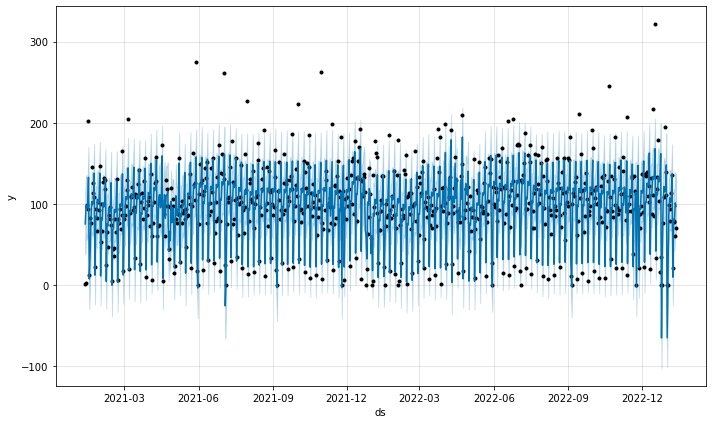

In [192]:
model.plot(train_forecast)
plt.show()

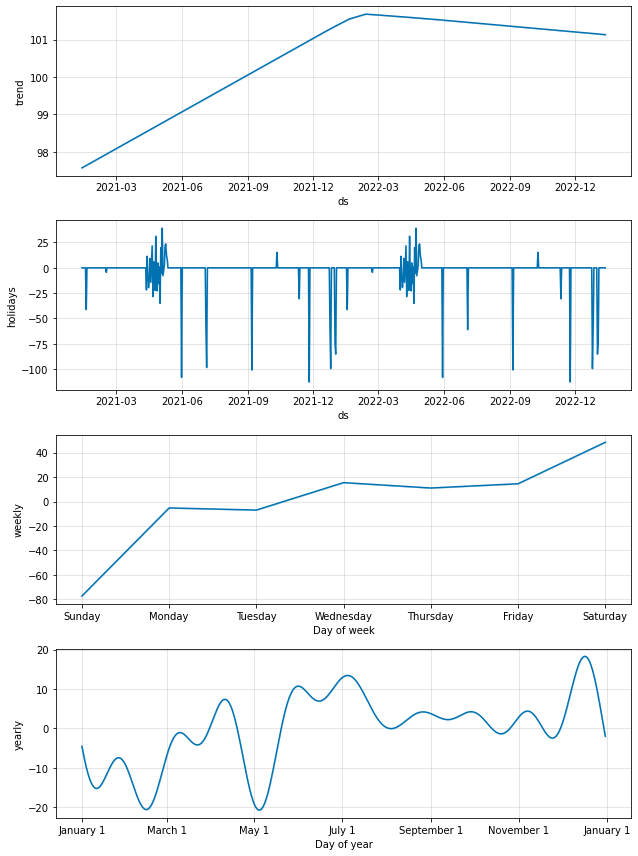

In [193]:
model.plot_components(train_forecast)
plt.show()

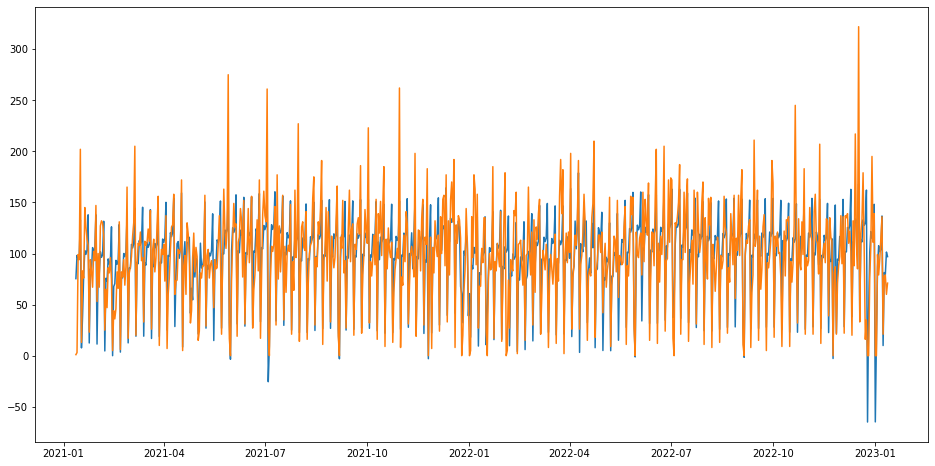

In [194]:
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(train_full['ds'],train_forecast['yhat'])
ax.plot(train_full['ds'],train_full['y'])
plt.show()

In [195]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_full['y'],train_forecast['yhat'],squared=False)

28.74342015624084

In [196]:
test_dates = pd.DataFrame(test_full['ds'])

In [197]:
test_forecast = model.predict(test_dates)

In [198]:
print(test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 2023-01-13  100.600723   63.015466  139.083272
1 2023-01-14  134.889102   99.510523  170.213488
2 2023-01-15    9.462620  -26.884554   42.882046
3 2023-01-16   40.996435    4.797337   80.676912
4 2023-01-17   81.133436   44.327007  114.678352


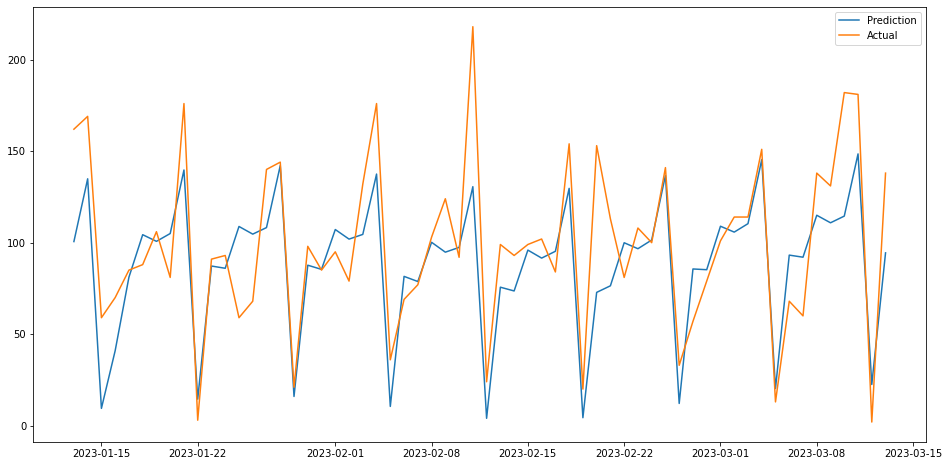

In [199]:
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(test_full['ds'],test_forecast['yhat'],label='Prediction')
ax.plot(test_full['ds'],test_full['y'],label='Actual')
ax.legend()
plt.show()

In [200]:
mean_squared_error(test_full['y'],test_forecast['yhat'],squared=False)

29.033819029983434

In [201]:
future = model.make_future_dataframe(periods=353)[790:]
future.head()

,ds
790,2023-03-13
791,2023-03-14
792,2023-03-15
793,2023-03-16
794,2023-03-17


In [202]:
future_forecast = model.predict(future)

In [203]:
print(future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 2023-03-13   94.430274   59.040145  129.964435
1 2023-03-14   92.415962   54.950706  128.537736
2 2023-03-15  114.543507   79.746789  148.912558
3 2023-03-16  109.744486   74.304025  145.024844
4 2023-03-17  112.839538   76.954132  150.428153


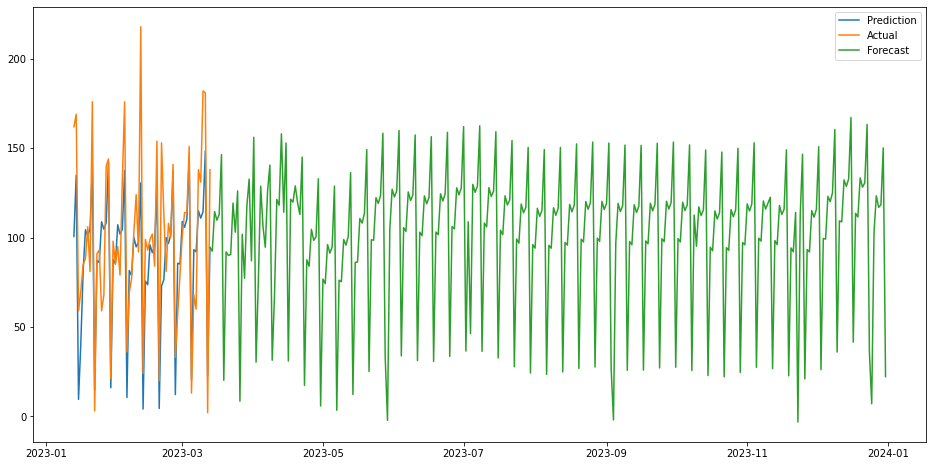

In [204]:
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(test_full['ds'],test_forecast['yhat'],label='Prediction')
ax.plot(test_full['ds'],test_full['y'],label='Actual')
ax.plot(future['ds'],future_forecast['yhat'],label='Forecast')
ax.legend()
plt.show()